# **Frontier Technologies Learning Collaborative​**
## **Week 3: Classification**

### **Question: What kind of data more suitable for a classification task?**

**A)** Quantative Data

**B)** Continuous Data

**C)** Categorical Data

C

### **Question: Which of the visual represent the Sigmoid Function? (A, B, C)**

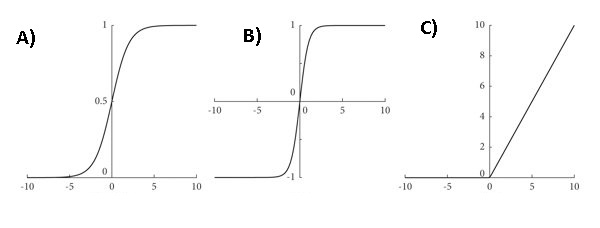

A

### **Question: Please write sigmoid function that receives a value and returns the output after sigmoid function calculation**

**The sigmoid function:**

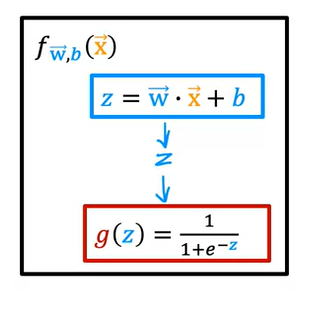

In [2]:
def sigmoid(z):

    g = 1/(1+np.exp(-z))
   
    return g

### **Question: Please visualize given sample dataset**

Expected output(please do not consider the colors or the theme of the sample visuals, main purpose is to visualize data points):



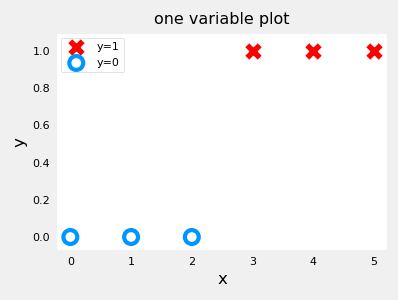

In [3]:
import numpy as np

In [4]:
x_train = np.array([0., 1, 2, 3, 4, 5])
y_train = np.array([0,  0, 0, 1, 1, 1])

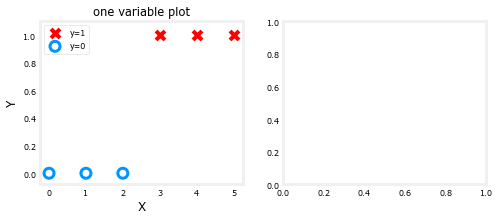

In [5]:
from lab_utils_common import dlc, plot_data
import matplotlib.pyplot as plt

pos = y_train == 1
neg = y_train == 0

fig,ax = plt.subplots(1,2,figsize=(8,3))
#plot 1, single variable
ax[0].scatter(x_train[pos], y_train[pos], marker='x', s=80, c = 'red', label="y=1")
ax[0].scatter(x_train[neg], y_train[neg], marker='o', s=100, label="y=0", facecolors='none', 
              edgecolors=dlc["dlblue"],lw=3)

ax[0].set_ylim(-0.08,1.1)
ax[0].set_ylabel('Y', fontsize=12)
ax[0].set_xlabel('X', fontsize=12)
ax[0].set_title('one variable plot')
ax[0].legend()

## **Classification Task: Finding smokers by body signals**

### **The dataset**

This dataset is a collection of basic health biological signal data.
The goal is to determine the presence or absence of smoking through bio-signals.

**Data shape: (55692, 27)**

*   **ID:** index
*   **gender**
*   **age:** 5-years gap
*   **height(cm)**
*   **weight(kg)**
*   **waist(cm):** Waist circumference length
*   **eyesight(left)**
*   **eyesight(right)**
*   **hearing(left)**
*   **hearing(right)**
*   **systolic:** Blood pressure
*   **relaxation:** Blood pressure
*   **fasting blood sugar**
*   **Cholesterol: **total
*   **triglyceride**
*   **HDL:** cholesterol type
*   **LDL:** cholesterol type
*   **hemoglobin**
*   **Urine protein**
*   **serum creatinine**
*   **AST:** glutamic oxaloacetic transaminase type
*   **ALT:** glutamic oxaloacetic transaminase type
*   **Gtp:** γ-GTP
*   **oral:** Oral Examination status
*   **dental caries**
*   **tartar:** tartar status
*   **smoking**

### **1. Import required packages**

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### **2. Import dataset**

In [7]:

file_path ="data/smoking.csv"
data_df = pd.read_csv(file_path)
data_df

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,55676,F,40,170,65,75.0,0.9,0.9,1.0,1.0,...,12.3,1.0,0.6,14.0,7.0,10.0,Y,1,Y,0
55688,55681,F,45,160,50,70.0,1.2,1.2,1.0,1.0,...,14.0,1.0,0.9,20.0,12.0,14.0,Y,0,Y,0
55689,55683,F,55,160,50,68.5,1.0,1.2,1.0,1.0,...,12.4,1.0,0.5,17.0,11.0,12.0,Y,0,N,0
55690,55684,M,60,165,60,78.0,0.8,1.0,1.0,1.0,...,14.4,1.0,0.7,20.0,19.0,18.0,Y,0,N,0


### **3. Explore dataset**

*   Info
*   Shape
*   Do  visualization on features, (i.e. gender distribution on a pie chart, or histograms on other kind of features)
*   Identify valuable features for ML training (observe correlations between smokers and not smokers based on the features)
*   Preapre the dataset for ML model (converting categorical values to numerical variables - labelencoding)

In [8]:
#Dataset info
#Get the shape of dataframe
print(data_df.shape)
print(data_df.isna().sum())
#Get the descriptive statistic information
data_df.describe()

(55692, 27)
ID                     0
gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
oral                   0
dental caries          0
tartar                 0
smoking                0
dtype: int64


,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,...,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000
mean,27845.500000,44.182917,164.649321,65.864936,82.046418,1.012623,1.007443,1.025587,1.026144,121.494218,...,57.290347,114.964501,14.622592,1.087212,0.885738,26.182935,27.036037,39.952201,0.213334,0.367288
std,16077.039933,12.071418,9.194597,12.820306,9.274223,0.486873,0.485964,0.157902,0.159564,13.675989,...,14.738963,40.926476,1.564498,0.404882,0.221524,19.355460,30.947853,50.290539,0.409665,0.482070
min,0.000000,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,...,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,1.000000,0.000000,0.000000
25%,13922.750000,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,...,47.000000,92.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000
50%,27845.500000,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,...,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,25.000000,0.000000,0.000000
75%,41768.250000,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,...,66.000000,136.000000,15.800000,1.000000,1.000000,28.000000,31.000000,43.000000,0.000000,1.000000
max,55691.000000,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,240.000000,...,618.000000,1860.000000,21.100000,6.000000,11.600000,1311.000000,2914.000000,999.000000,1.000000,1.000000


[859, 19596]


C:\Users\PNGORAN\AppData\Local\Temp\ipykernel_9948\302612913.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  female_number = smoking_df[data_df["gender"]=="F"]["gender"].count()
C:\Users\PNGORAN\AppData\Local\Temp\ipykernel_9948\302612913.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  male_number = smoking_df[data_df["gender"]=="M"]["gender"].count()


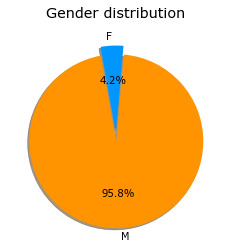

<AxesSubplot:xlabel='height(cm)', ylabel='Count'>

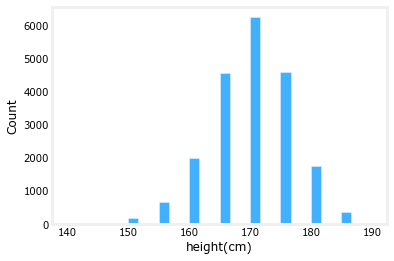

In [9]:
#Feature visualization
smoking_df= data_df[data_df["smoking"]==1]
female_number = smoking_df[data_df["gender"]=="F"]["gender"].count()
male_number = smoking_df[data_df["gender"]=="M"]["gender"].count()
data_df["gender"].unique().tolist()
gender_distribution = [female_number, male_number]
print(gender_distribution)
genders = data_df["gender"].unique().tolist()
plt.pie(gender_distribution, labels=genders, autopct='%1.1f%%', startangle=85, shadow=True, explode=(0,0.1))
plt.title('Gender distribution')
plt.show()

sns.histplot(smoking_df['height(cm)'],kde=False,bins=30)

<AxesSubplot:>

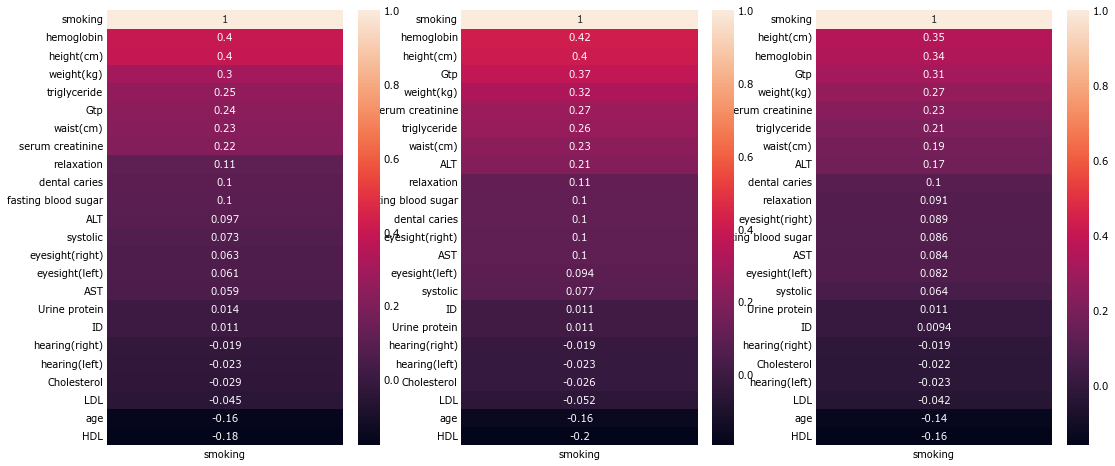

In [10]:
#valuable features for ML training 
data_df.corr()
fig, ax = plt.subplots(1,3, figsize=(18, 8))

corr1 = data_df.corr('pearson')[['smoking']].sort_values(by='smoking', ascending=False)
corr2 = data_df.corr('spearman')[['smoking']].sort_values(by='smoking', ascending=False)
corr3 = data_df.corr('kendall')[['smoking']].sort_values(by='smoking', ascending=False)


sns.heatmap(corr1, ax=ax[0], annot=True)
sns.heatmap(corr2, ax=ax[1], annot=True)
sns.heatmap(corr3, ax=ax[2], annot=True)
#sns.pairplot(data_df)
# sns.pairplot(data_df,hue='smoking',palette='coolwarm')

In [11]:
#Preapre the dataset for ML model
def label_to_numbers(data):
#     print(len(data))
    for key,value in data.items():
#         print(x)
        if value =="Y":
#             print(x)
            data[key] = 1
        elif value =="N":
            data[key] = 0
        if value =="M":
#             print(x)
            data[key] = 1
        elif value =="F":
            data[key] = 0
    
    return data
data_df[["gender","oral","tartar"]] = data_df[["gender","oral","tartar"]].apply(label_to_numbers)
data_df.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,0,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,1,0,1,0
1,1,0,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,1,0,1,0
2,2,1,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,1,0,0,1
3,3,1,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,1,0,1,0
4,4,0,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,1,0,0,0


### **4. Build & Train Logistic Regression model (sklearn)**


*   Split the dataset into test and training sets (X_train, X_test, y_train, y_test)
*   Initiate the logistic regression model
*   Start training (you may also adjust parameters)




In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score
from sklearn.linear_model import LogisticRegression
# please do add other packages in need

In [13]:
#Split the dataset into test and training sets
random_seed = 123

X =  data_df[['age','gender', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)', 'eyesight(right)', 'hearing(left)','hearing(right)','systolic','relaxation','fasting blood sugar','Cholesterol','triglyceride','HDL','LDL','hemoglobin','Urine protein','serum creatinine','AST','ALT','Gtp','dental caries']]
Y =  data_df[['smoking']]
X_train, X_test, y_train, y_test = train_test_split(X,Y, random_state=random_seed,test_size = 0.2, shuffle=True)


In [14]:
#Initiate the logistic regression model
lr_model = LogisticRegression( max_iter=10000)
#Train the model
lr_model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=10000)

### **5. Evaluate the LR model with the test dataset**

- Classification report

Defaulting to user installation because normal site-packages is not writeable
              precision    recall  f1-score   support

           0       0.81      0.77      0.79      7037
           1       0.64      0.69      0.66      4102

    accuracy                           0.74     11139
   macro avg       0.72      0.73      0.73     11139
weighted avg       0.75      0.74      0.74     11139



<AxesSubplot:title={'center':'Confusion Matrix '}, xlabel='Predicted label', ylabel='True label'>

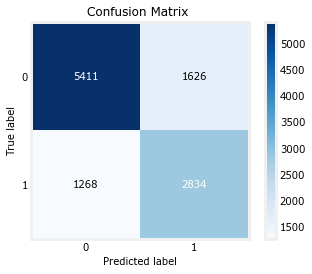

In [15]:
from sklearn.metrics import classification_report
!pip install scikit-plot==0.3.7
import scikitplot as skplt


y_pred = lr_model.predict(X_test)
print(classification_report(y_test, y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False, title = 'Confusion Matrix ')

### **6. Visualize the classification results**